<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<br><strong>Unsupervised Analysis Project</strong> Windows or Macbook<br>
Hult International Business School | Machine Learning<br>
MSBA4 Team 3 |<br>
Camilla Sandfeld Hansen<br>
Jorge Delgado<br>
Tetsuya Mano<br>
Haiyan Hu<br><br>

Word count: 1436

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

Step One - Cleaning data and create two datasets for the Big Five personality traits and the Hult DNA.
    
We flipped the negative questions to positives making the data cleaner and easier to analyze and interpret. 

In [1]:
########################################
# importing packages
########################################
import numpy as np                                      # mathematical essentials
import pandas            as pd                          # data science essentials
import matplotlib.pyplot as plt                         # fundamental data visualization
import seaborn           as sns                         # enhanced visualizations
from sklearn.preprocessing import StandardScaler        # standard scaler
from sklearn.decomposition import PCA                   # pca
from scipy.cluster.hierarchy import dendrogram, linkage # dendrograms
from sklearn.cluster         import KMeans              # k-means clustering
from sklearn.preprocessing import LabelEncoder # Label encoding

# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 2000)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 1000)

#loading survey data
df_survey = pd.read_excel('survey_data.xlsx')
df_conversion = pd.read_excel('conversion.xlsx')

In [2]:
# checking to see if there are any missing info
df_survey.isnull().sum(axis = 0).any()

False

In [3]:
# Define a list for dropping redundunt columns
lst_drop = ["Encourage direct and open discussions.1", "Respond effectively to multiple priorities.1", "Take initiative even when circumstances, objectives, or rules aren't clear.1"]

# drop the redundant columns
df_survey.drop(labels=lst_drop, axis=1, inplace=True)

In [4]:
# summarise ethinicity

for index, value in df_survey.iterrows():
    if df_survey.loc[index, 'What is your ethnicity?'] == "White / Caucasian" or df_survey.loc[index, 'What is your ethnicity?']=="Native American":
        df_survey.loc[index, 'What is your ethnicity?'] = "Caucasian"
    if df_survey.loc[index, 'What is your ethnicity?'] == "West Asian / Indian" or df_survey.loc[index, 'What is your ethnicity?']=="Middle Eastern":
        df_survey.loc[index, 'What is your ethnicity?'] = "Indian"
    if df_survey.loc[index, 'What is your ethnicity?'] == "Far east Asian":
        df_survey.loc[index, 'What is your ethnicity?'] = "Asian"
    if df_survey.loc[index, 'What is your ethnicity?'] == "Hispanic / Latino":
        df_survey.loc[index, 'What is your ethnicity?'] = "Latino"
    if df_survey.loc[index, 'What is your ethnicity?'] == "African American":
        df_survey.loc[index, 'What is your ethnicity?'] = "African"

In [5]:
#nationality is very diversed and we don't have enough sample numbers.
#
df_survey["What is your ethnicity?"].value_counts(ascending= False)

Caucasian               39
Asian                   29
Indian                  27
Latino                  25
Prefer not to answer     9
African                  8
Name: What is your ethnicity?, dtype: int64

In [6]:
# create a new column called "age_range" for further analysis
df_survey['age_range']= 0

for index, value in df_survey.iterrows():
    if df_survey.loc[index, 'What is your age?'] <= 24:
        df_survey.loc[index, "age_range"] = "Age below 24"
    elif df_survey.loc[index, 'What is your age?'] <= 29 and df_survey.loc[index, 'What is your age?'] >24:
        df_survey.loc[index, "age_range"] = "Age 25-30"
    else: 
        df_survey.loc[index, "age_range"] = "Above 30"
 

In [7]:
# Make seperate dataframes for two different analysis both big five traits and hult DNA
df_big5 = df_survey.iloc[:, 1:51]
df_hult = df_survey.iloc[:, 51:69]


In [8]:
## flipping negative questions to positive questions based on BIG 5 criteria and Hult DNA.
for index, col in df_conversion[df_conversion['Revised'] == 'f'].iterrows():
    
    if col['Original question'] in df_big5.columns:
        
        # Flip the number
        df_big5.loc[:, col['Original question']] = df_big5.loc[:, col['Original question']].replace({1: 5, 2: 4, 4: 2, 5: 1})
        df_survey.loc[:, col['Original question']] = df_survey.loc[:, col['Original question']].replace({1: 5, 2: 4, 4: 2, 5: 1})
        
        # Update the column name to maintain consistency
        df_survey = df_survey.rename(columns = {col['Original question'] : 'f_' + col['Revised question']})
        df_big5 = df_big5.rename(columns = {col['Original question'] : 'f_' + col['Revised question']})
        
    elif col['Original question'] in df_hult.columns:
    
        # Flip the number
        df_hult.loc[:, col['Original question']] = df_hult.loc[:, col['Original question']].replace({1: 5, 2: 4, 4: 2, 5: 1})
        df_survey.loc[:, col['Original question']] = df_survey.loc[:, col['Original question']].replace({1: 5, 2: 4, 4: 2, 5: 1})
        
        # Update the column name to maintain consistency
        df_survey = df_survey.rename(columns = {col['Original question'] : 'f_' + col['Revised question']})
        df_hult = df_hult.rename(columns = {col['Original question'] : 'f_' + col['Revised question']})

    

In [9]:
# scaling the data for PCA analysis
# INSTANTIATING a StandardScaler() object
scaler_big5 = StandardScaler()
scaler_hult = StandardScaler()

# FITTING the scaler with the data
scaler_big5_fit = scaler_big5.fit(df_big5)
scaler_hult_fit = scaler_hult.fit(df_hult)

# TRANSFORMING our data after fit
big5_scaled = scaler_big5_fit.transform(df_big5)
hult_scaled = scaler_hult_fit.transform(df_hult)

# converting scaled data into a DataFrame
df_big5_scaled = pd.DataFrame(big5_scaled)
df_hult_scaled = pd.DataFrame(hult_scaled)

# reattaching column names
df_big5_scaled.columns = df_big5.columns
df_hult_scaled.columns = df_hult.columns


# checking pre- and post-scaling variance
#print(pd.np.var(df_big5), '\n\n')
#print(pd.np.var(df_big5_scaled))

#print(pd.np.var(df_hult), '\n\n')
#print(pd.np.var(df_hult_scaled))



<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<strong>Step 2: Principal Component Analysis</strong>

Our process here is to:
1. Develop a PCA model with no limit to principal components
2. Analyze the <strong>explained_variance_ratio</strong> and the <strong>scree plot</strong>
3. Decide how many components to RETAIN
4. Build a new model with a limited number of principal components
5. Interpret the results (what does each PC represent)

<br>

In [10]:
#User-Defined Functions
#The user-defined functions used throughout this Notebook.
########################################
# inertia
########################################
def interia_plot(data, max_clust = 50):
    """
PARAMETERS
----------
data      : DataFrame, data from which to build clusters. Dataset should be scaled
max_clust : int, maximum of range for how many clusters to check interia, default 50
    """

    ks = range(1, max_clust)
    inertias = []


    for k in ks:
        # INSTANTIATING a kmeans object
        model = KMeans(n_clusters = k)


        # FITTING to the data
        model.fit(data)


        # append each inertia to the list of inertias
        inertias.append(model.inertia_)



    # plotting ks vs inertias
    fig, ax = plt.subplots(figsize = (12, 8))
    plt.plot(ks, inertias, '-o')


    # labeling and displaying the plot
    plt.xlabel('number of clusters, k')
    plt.ylabel('inertia')
    plt.xticks(ks)
    plt.show()


########################################
# scree_plot
########################################
def scree_plot(pca_object, export = False):
    # building a scree plot

    # setting plot size
    fig, ax = plt.subplots(figsize=(10, 8))
    features = range(pca_object.n_components_)


    # developing a scree plot
    plt.plot(features,
             pca_object.explained_variance_ratio_,
             linewidth = 2,
             marker = 'o',
             markersize = 10,
             markeredgecolor = 'black',
             markerfacecolor = 'grey')


    # setting more plot options
    plt.title('Scree Plot')
    plt.xlabel('PCA feature')
    plt.ylabel('Explained Variance')
    plt.xticks(features)

    if export == True:
    
        # exporting the plot
        plt.savefig('./analysis_images/top_customers_correlation_scree_plot.png')
        
    # displaying the plot
    plt.show()

a) Develop a PCA object with no limit to principal components and analyze its scree plot.

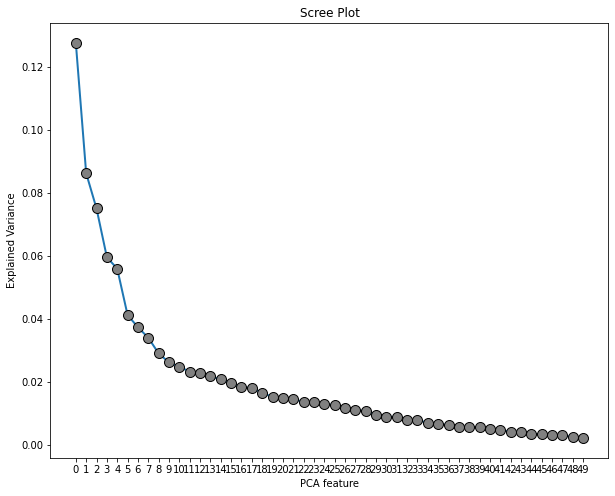

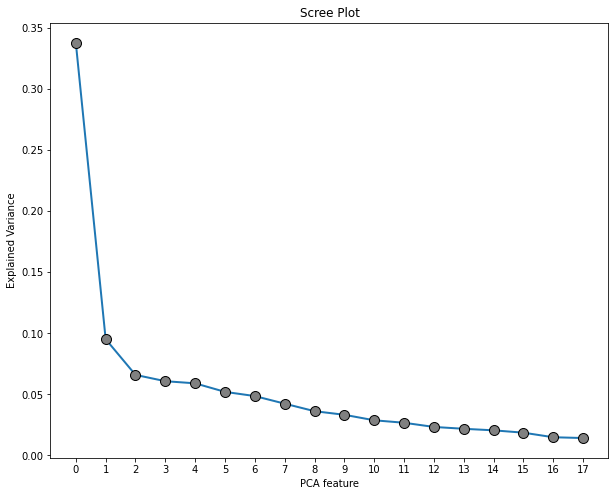

In [11]:
# INSTANTIATING a PCA object with no limit to principal components
pca_big5 = PCA(n_components = None, random_state = 219)
pca_hult = PCA(n_components = None, random_state = 219)

# FITTING and TRANSFORMING the scaled data
big5_pca = pca_big5.fit_transform(df_big5_scaled)
hult_pca = pca_hult.fit_transform(df_hult_scaled)

# calling the scree_plot function
scree_plot(pca_object = pca_big5)
scree_plot(pca_object = pca_hult)


<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<strong>b) Reduce the number of principal components to a reasonable number based on the scree plot above.</strong><br>
We determine to choose 10 components for Big 5 and 3 components for Hult DNA based on the elbow as it is the optimal number to explain the characteristics. 

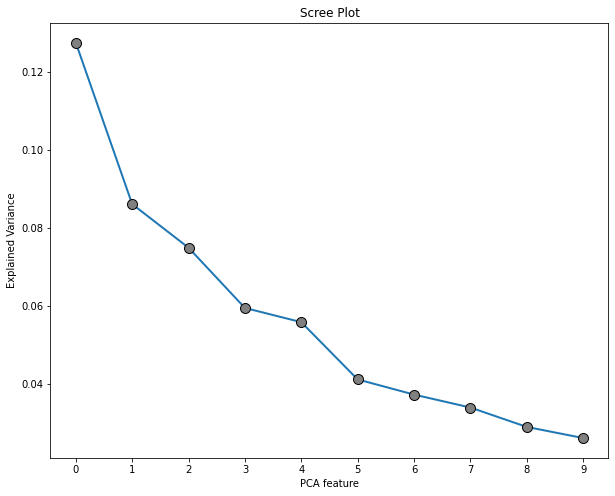

In [12]:
# INSTANTIATING a new model using the first three principal components
pca_big5_10 = PCA(n_components=10,
            random_state= 219)


# FITTING and TRANSFORMING the purchases_scaled
big5_pca_10 = pca_big5_10.fit_transform(df_big5_scaled)


# calling the scree_plot function
scree_plot(pca_object=pca_big5_10)

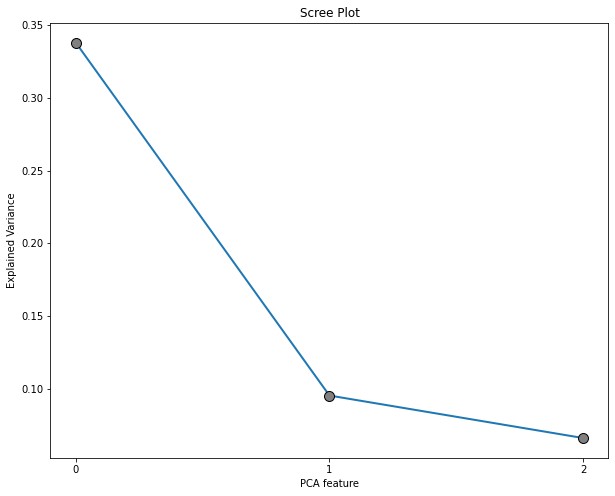

In [13]:
# INSTANTIATING a new model using the first three principal components
pca_hult_3 = PCA(n_components=3,
            random_state= 219)


# FITTING and TRANSFORMING the purchases_scaled
hult_pca_3 = pca_hult_3.fit_transform(df_hult_scaled)


# calling the scree_plot function
scree_plot(pca_object=pca_hult_3)

In [14]:
####################
### Max PC Model ###
####################
# transposing pca components (pc = MAX)
factor_loadings_big5 = pd.DataFrame(pd.np.transpose(pca_big5.components_))


# naming rows as original features
factor_loadings_big5 = factor_loadings_big5.set_index(df_big5_scaled.columns)


##################
### 10 PC Model ###
##################
# transposing pca components (pc = 10)
factor_loadings_big5_10 = pd.DataFrame(pd.np.transpose(pca_big5_10.components_))


# naming rows as original features
factor_loadings_big5_10 = factor_loadings_big5_10.set_index(df_big5_scaled.columns)




<ipython-input-14-13b5dd9bcf44>:5: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  factor_loadings_big5 = pd.DataFrame(pd.np.transpose(pca_big5.components_))
<ipython-input-14-13b5dd9bcf44>:16: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  factor_loadings_big5_10 = pd.DataFrame(pd.np.transpose(pca_big5_10.components_))


In [15]:
####################
### Max PC Model ###
####################
# transposing pca components (pc = MAX)
factor_loadings_hult = pd.DataFrame(pd.np.transpose(pca_hult.components_))


# naming rows as original features
factor_loadings_hult = factor_loadings_hult.set_index(df_hult_scaled.columns)


##################
### 3 PC Model ###
##################
# transposing pca components (pc = 3)
factor_loadings_hult_3 = pd.DataFrame(pd.np.transpose(pca_hult_3.components_))


# naming rows as original features
factor_loadings_hult_3 = factor_loadings_hult_3.set_index(df_hult_scaled.columns)



<ipython-input-15-bca1766c32bb>:5: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  factor_loadings_hult = pd.DataFrame(pd.np.transpose(pca_hult.components_))
<ipython-input-15-bca1766c32bb>:16: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  factor_loadings_hult_3 = pd.DataFrame(pd.np.transpose(pca_hult_3.components_))


<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<strong>c) Analyze and name each principal component based on its factor loading.</strong>

In this step, we developed personas for each PC name to divide the survey respondends into small groups. 

In [16]:
# naming each principal component -> correlation matrix
factor_loadings_big5_10.columns = ['Depressed Artists',                   #
                                                       'Stressed Sales',                       #
                                                       'Extrovert Party Animal',
                                                       'Artistic Abstract Dreamer',
                                                       'Meditation and Yoga Lover',
                                                       'Outgoing German',
                                                       'Easy-going Entrepeneur',
                                                       'Your psychologist',
                                                       'Structured Over-thinker',
                                                       'Open-hearted Peaceful Hippie'] # 


# checking the result
factor_loadings_big5_10.to_excel('factor_loadings_10.xlsx')



# naming each principal component -> correlation matrix
factor_loadings_hult_3.columns = ['Heavy lift',     #
                                               'Team player',       # 
                                               'Dominant boss']  # 

# checking the result
factor_loadings_hult_3.to_excel('factor_loadings_3.xlsx')


<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<strong>d) Analyze the factor loadings for each person in the survey.</strong>

In [17]:
# analyzing factor strengths per customer
X_pca_big5_reduced = pca_big5_10.transform(df_big5_scaled)


# converting to a DataFrame
X_pca_big5_df = pd.DataFrame(X_pca_big5_reduced)


# renaming columns
X_pca_big5_df.columns = factor_loadings_big5_10.columns


# checking the results
#X_pca_big5_df

In the second survey surrounding the big five personality traits 9 big personas was identified. These will be outlined below:

<strong>1) Depressed artist</strong> 

This individual is an abstract thinker that takes on others emotions easily. The person has some mental issues such as mood swings and getting easily upset. 

<strong>2) Stressed sales</strong>

While this person is super outgoing some factors such as mood swings, .., suggests that this person is rather stressed (which could be due to high sales targets) 

<strong>3) Extrovert Party-animal</strong>

This person loves attention and parties. Everyone knows this person and the person knows everyone. "life is a party" is the motto and worrying is a waste of life. 

<strong>4) Artistic Abstract Dreamer </strong>

This person would be the most colorful person in the room. Probably an writer or artist as he/she have a vivid imagination and likes new ideas. Positively, colorful and big understanding is key words. 

<strong>5) Meditation and Yoga Lover</strong>

As soon as this person walks into the room you feel her/his calm. The person rests in itself which means stress is not a word he/she knows. The person is relaxed, likes work and new ideas and have a soft heart. 

<strong>6) Outgoing German</strong>

The best gift to give this person is a calendar. Every hour is clearly scheduled and things are getting done. However, a little party and some attention is also appreciated. 

<strong>7) Easy-going entrepreneur </strong>

This person has a high EQ, people like him/her and he/she likes the attention, which makes the person a great networker. Ideas are welcomed and being proactive in his work is a keyword.

<strong>8) Your Psychologist </strong>

This person quickly understands other people, is a great listener and knows what to say to make you feel good. The person is clever and prefer to listen and understand other people rather than being the center of attention her/himself.

<strong>9) Open-hearted peaceful hippie </strong>


This person can be found around a bonfire where she/he has brought cookies for everyone and singing songs with a guitar. 
The person is kind, calm and compassionate and loves meeting new people.  


In [18]:
# analyzing factor strengths per customer
X_pca_hult_reduced = pca_hult_3.transform(df_hult_scaled)


# converting to a DataFrame
X_pca_hult_df = pd.DataFrame(X_pca_hult_reduced)


# renaming columns
X_pca_hult_df.columns = factor_loadings_hult_3.columns


# checking the results
#X_pca_hult_df

3 main clusters where identified from the data gathered from the HULT DNA survey. These have been categorized into the following:

<strong>1) Heavy Lift</strong>

An interesting insight from the Heavy Lift is that all the correlations are negative and as it was decided to flip the negative question to positive this accordingly shows a lack of HULT DNA which is characterized by having a growth mindset. Hence, the name Heavy Leaf means that it is an individual which does not contribute to much positively nor are proactive. 

<strong>2) Team Player</strong>

This individual is a great team play which is identified through the high positive correlations of using feedback, relationsship builder, listener and good at discussions. In the other end, the negative correlations showed a lack of leadership skills by having high negative correlations in areas as rally the team around a common goal and persuasively sell a vision or idea. 

<strong>3) Dominant Boss</strong>

Lastly, we identified this cluster as a dominant boss due to the fact that he is proactive and aware of his own strengths. However, the person is not rich on ideas nor listens to others.


In [19]:
#Sending PCA factor loadings to excel
X_pca_big5_df.to_excel('./X_pca_big5_df Loadings.xlsx',
                  index = False)
X_pca_hult_df.to_excel('./X_pca_hult_df.xlsx',
                  index = False)

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<strong>Part 3: Clustering</strong><br>

In [20]:
# checking variance amongst clusters
np.var(X_pca_big5_df)
np.var(X_pca_hult_df)

Heavy lift       6.082960
Team player      1.713062
Dominant boss    1.186695
dtype: float64

In [21]:
# INSTANTIATING a StandardScaler() object
scaler_big5 = StandardScaler()
scaler_hult = StandardScaler()

# FITTING the scaler with the data
scaler_big5.fit(X_pca_big5_df)
scaler_hult.fit(X_pca_hult_df)


# TRANSFORMING our data after fit
X_big5_scaled = scaler_big5.transform(X_pca_big5_df)
X_hult_scaled = scaler_hult.transform(X_pca_hult_df)


# converting scaled data into a DataFrame
pca_big5_scaled = pd.DataFrame(X_big5_scaled)
pca_hult_scaled = pd.DataFrame(X_hult_scaled)

# reattaching column names
pca_big5_scaled.columns =  X_pca_big5_df.columns
pca_hult_scaled.columns =  X_pca_hult_df.columns


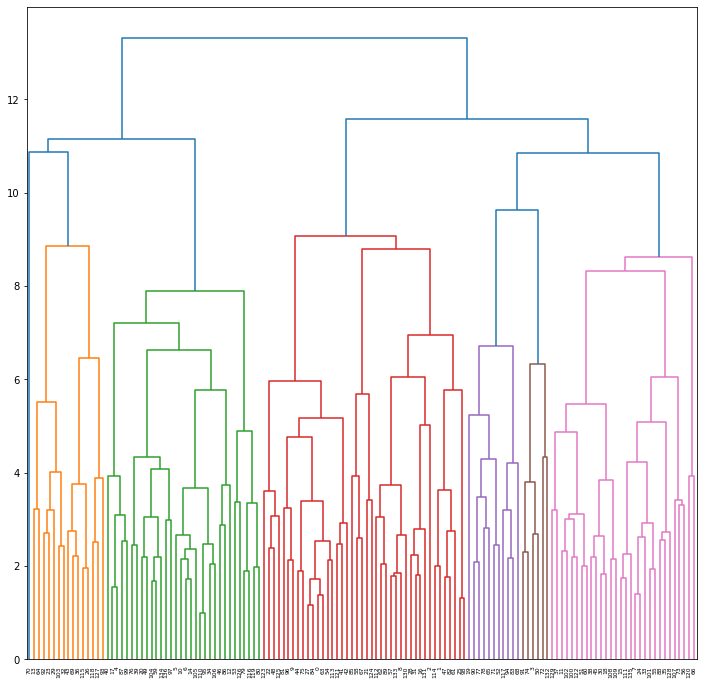

In [22]:
# Run the following code to develop a dendrogram. 
# Our goal here is to understand how many clusters to build using k-Means.
# grouping data based on Ward distance
standard_mergings_ward = linkage(y = pca_big5_scaled,
                                 method = 'ward',
                                 optimal_ordering = True)


# setting plot size
fig, ax = plt.subplots(figsize=(12, 12))

# developing a dendrogram
dendrogram(Z = standard_mergings_ward,
           leaf_rotation = 90,
           leaf_font_size = 6)


# saving and displaying the plot
plt.savefig('./standard_hierarchical_clust_ward.png')
plt.show()

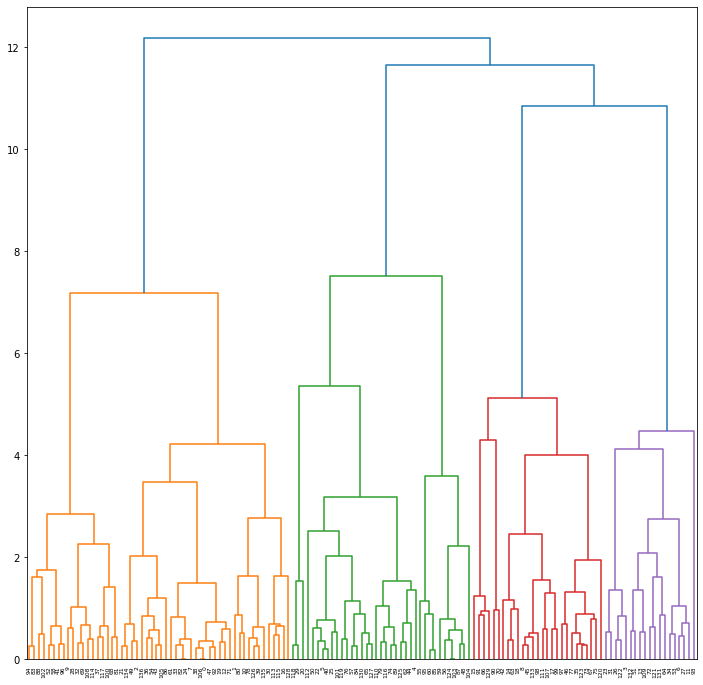

In [23]:
# grouping data based on Ward distance
standard_mergings_ward = linkage(y = pca_hult_scaled,
                                 method = 'ward',
                                 optimal_ordering = True)


# setting plot size
fig, ax = plt.subplots(figsize=(12, 12))

# developing a dendrogram
dendrogram(Z = standard_mergings_ward,
           leaf_rotation = 90,
           leaf_font_size = 6)


# saving and displaying the plot
plt.savefig('./standard_hierarchical_clust_ward.png')
plt.show()

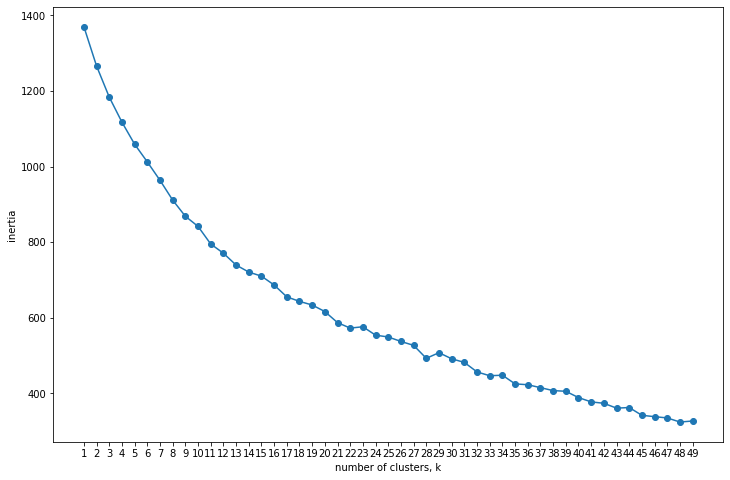

In [24]:
# calling the inertia_plot() function
interia_plot(data = pca_big5_scaled)

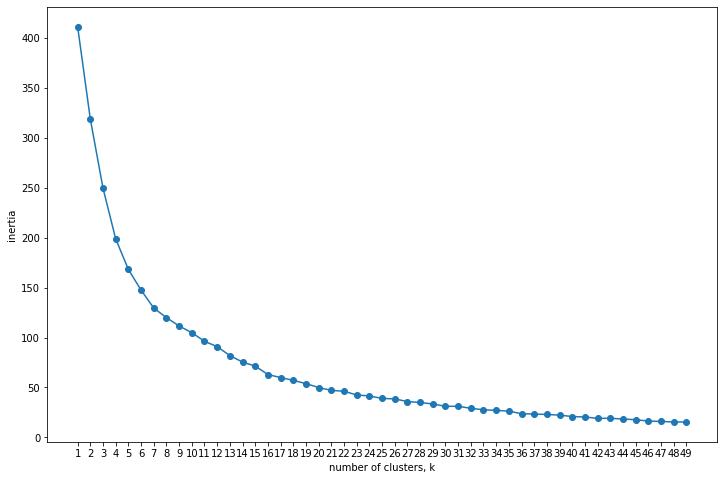

In [25]:
# calling the inertia_plot() function
interia_plot(data = pca_hult_scaled)

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<strong>a) Complete the code to develop a k-Means model with 3 clusters for BIG 5 and 3 for Hult DNA.</strong>

In [26]:
# INSTANTIATING a k-Means object with five clusters
big5_k_pca = KMeans(n_clusters=3, random_state = 219)


# fitting the object to the data
big5_k_pca.fit(pca_big5_scaled)


# converting the clusters to a DataFrame
big5_kmeans_pca = pd.DataFrame({'Cluster': big5_k_pca.labels_})


# checking the results
print(big5_kmeans_pca.iloc[: , 0].value_counts())

2    59
1    53
0    25
Name: Cluster, dtype: int64


In [27]:
# storing cluster centers
centroids_big5_pca = big5_k_pca.cluster_centers_


# converting cluster centers into a DataFrame
centroids_big5_pca_df = pd.DataFrame(centroids_big5_pca)

# renaming principal components
centroids_big5_pca_df.columns =  ['Depressed Artists',                   #
                                                       'Stressed Sales',                       #
                                                       'Extrovert Party Animal',
                                                       'Artistic Abstract Dreamer',
                                                       'Meditation and Yoga Lover',
                                                       'Outgoing German',
                                                       'Easy-going Entrepeneur',
                                                       'Your psychologist',
                                                       'Structured Over-thinker',
                                                       'Open-hearted Peaceful Hippie']

# checking results (clusters = rows, pc = columns)
centroids_big5_pca_df.round(2)


,Depressed Artists,Stressed Sales,Extrovert Party Animal,Artistic Abstract Dreamer,Meditation and Yoga Lover,Outgoing German,Easy-going Entrepeneur,Your psychologist,Structured Over-thinker,Open-hearted Peaceful Hippie
0,0.50,0.02,-0.07,-0.72,0.73,0.27,-1.12,0.31,-0.28,0.03
1,0.27,-0.08,-0.32,0.13,-0.33,0.01,0.59,0.41,-0.53,-0.11
2,-0.46,0.07,0.31,0.18,-0.02,-0.12,-0.05,-0.50,0.59,0.08


In [28]:
# INSTANTIATING a k-Means object with five clusters
hult_k_pca = KMeans(n_clusters=3, random_state = 219)


# fitting the object to the data
hult_k_pca.fit(pca_hult_scaled)


# converting the clusters to a DataFrame
hult_kmeans_pca = pd.DataFrame({'Cluster': hult_k_pca.labels_})


# checking the results
print(hult_kmeans_pca.iloc[: , 0].value_counts())

0    53
1    48
2    36
Name: Cluster, dtype: int64


In [29]:
# storing cluster centers
centroids_hult_pca = hult_k_pca.cluster_centers_

# converting cluster centers into a DataFrame
centroids_hult_pca_df = pd.DataFrame(centroids_hult_pca)

# renaming principal components
centroids_hult_pca_df.columns =  ['Heavy lift',     #
                                               'Team player',       # 
                                               'Dominant boss']

# checking results (clusters = rows, pc = columns)
centroids_hult_pca_df.round(2)


,Heavy lift,Team player,Dominant boss
0,-0.62,-0.73,-0.17
1,0.65,0.13,0.84
2,0.04,0.91,-0.87


In [30]:
# concatenating cluster memberships with principal components
clst_pca_big5_df = pd.concat([big5_kmeans_pca,
                         X_pca_big5_df],
                         axis = 1)


# checking results
clst_pca_big5_df


# concatenating demographic information with pca-clusters
final_pca_clust_big5_df = pd.concat([df_survey.iloc[ : , 69:],
                                clst_pca_big5_df],
                                axis = 1)


# renaming columns
final_pca_clust_big5_df.columns = ['Present laptop',
                                            'Next laptop',
                                            'Enroled program',
                                            'Age',
                                            'Gender',
                                            'Nationality',
                                            'Ethnicity',
                                            'Age range'] + clst_pca_big5_df.columns.to_list()

# checking the results
#print(final_pca_clust_big5_df.head(n = 5))
final_pca_clust_big5_df.head()

,Present laptop,Next laptop,Enroled program,Age,Gender,Nationality,Ethnicity,Age range,Cluster,Depressed Artists,Stressed Sales,Extrovert Party Animal,Artistic Abstract Dreamer,Meditation and Yoga Lover,Outgoing German,Easy-going Entrepeneur,Your psychologist,Structured Over-thinker,Open-hearted Peaceful Hippie
0,Macbook,Macbook,DD (MIB & Business Analytics),25,Female,ecuador,Latino,Age 25-30,2,0.173005,-0.399876,-0.413159,0.480734,-1.395198,1.282715,-0.594194,0.453930,0.905308,-0.154408
1,Windows laptop,Windows laptop,One year Business Analytics,27,Male,Ecuador,Latino,Age 25-30,2,0.831807,-0.256438,-1.652758,1.588693,1.756269,-0.139108,0.858713,-1.722623,0.645956,0.228727
2,Windows laptop,Windows laptop,One year Business Analytics,25,Male,Indian,Indian,Age 25-30,2,1.281935,-3.172454,4.321521,2.377029,-0.532095,1.347138,-2.399644,-2.081427,-0.016572,1.468578
3,Windows laptop,Windows laptop,One year Business Analytics,26,Female,indian,Indian,Age 25-30,2,0.607478,2.931733,-1.309707,-1.383110,2.304747,-0.519832,0.619525,-2.340361,1.675789,-0.120979
4,Macbook,Windows laptop,DD (MBA & Disruptive innovation),27,Male,China,Asian,Age 25-30,0,3.725633,1.736512,1.085582,0.107915,-0.040628,1.501966,-1.224093,0.460867,-0.381762,0.351112


In [31]:
# concatenating cluster memberships with principal components
clst_pca_hult_df = pd.concat([hult_kmeans_pca,
                         X_pca_hult_df],
                         axis = 1)


# checking results
clst_pca_hult_df


# concatenating demographic information with pca-clusters
final_pca_clust_hult_df = pd.concat([df_survey.iloc[ : , 69:],
                                clst_pca_hult_df],
                                axis = 1)


# renaming columns
final_pca_clust_hult_df.columns = ['Present laptop',
                                            'Next laptop',
                                            'Enroled program',
                                            'Age',
                                            'Gender',
                                            'Nationality',
                                            'Ethnicity',
                                            'Age range'] + clst_pca_hult_df.columns.to_list()

# checking the results
#print(final_pca_clust_hult_df.head(n = 5))
final_pca_clust_hult_df.describe()

,Age,Cluster,Heavy lift,Team player,Dominant boss
count,137.000000,137.000000,1.370000e+02,1.370000e+02,1.370000e+02
mean,27.226277,0.875912,-1.296611e-16,6.483054e-17,-1.012977e-16
std,5.119158,0.799313,2.475417e+00,1.313643e+00,1.093353e+00
min,21.000000,0.000000,-4.924858e+00,-2.780609e+00,-2.840991e+00
25%,24.000000,0.000000,-1.809708e+00,-8.348584e-01,-7.283700e-01
50%,26.000000,1.000000,6.124301e-03,-9.157566e-02,-2.683619e-02
75%,29.000000,2.000000,1.535461e+00,7.992268e-01,6.283102e-01
max,49.000000,2.000000,7.989605e+00,5.659734e+00,3.393849e+00


In [32]:
# adding a productivity step
df_data_big5 = final_pca_clust_big5_df
df_data_hult = final_pca_clust_hult_df


# checking results
#df_data_big5
#df_data_hult

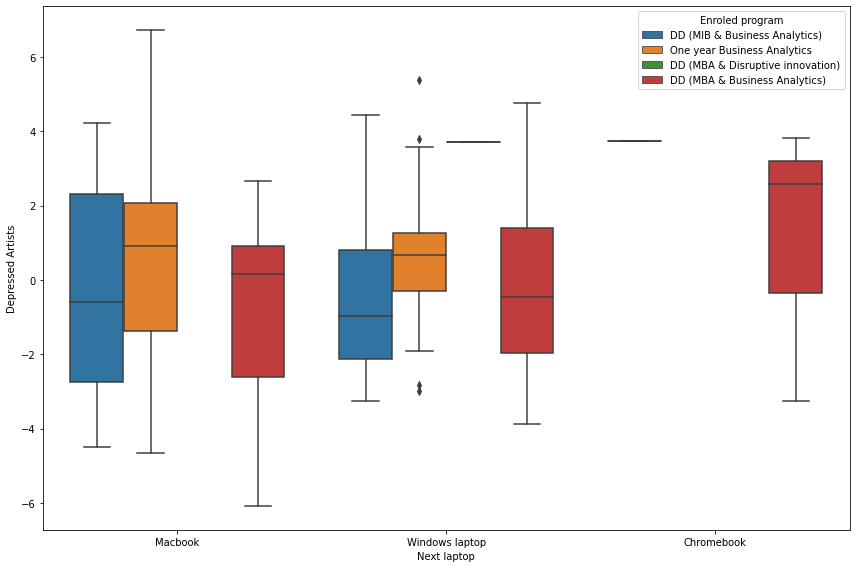

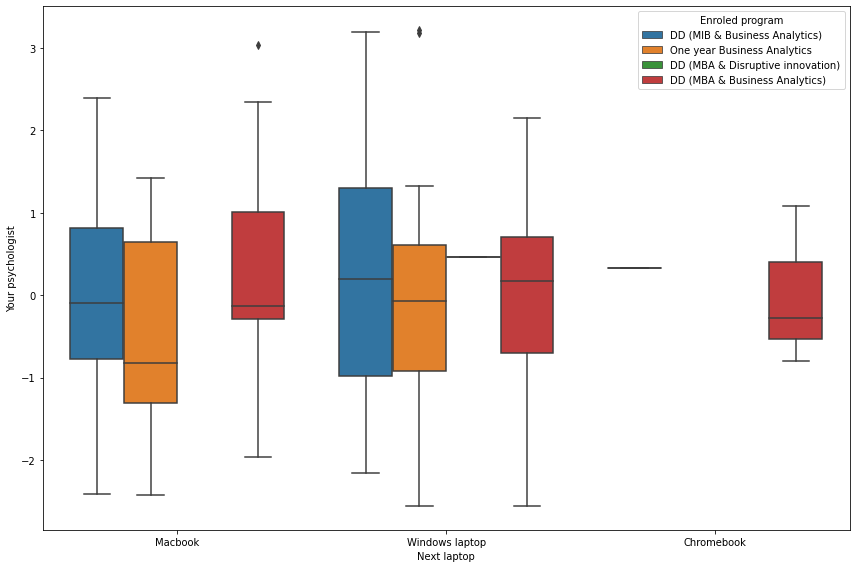

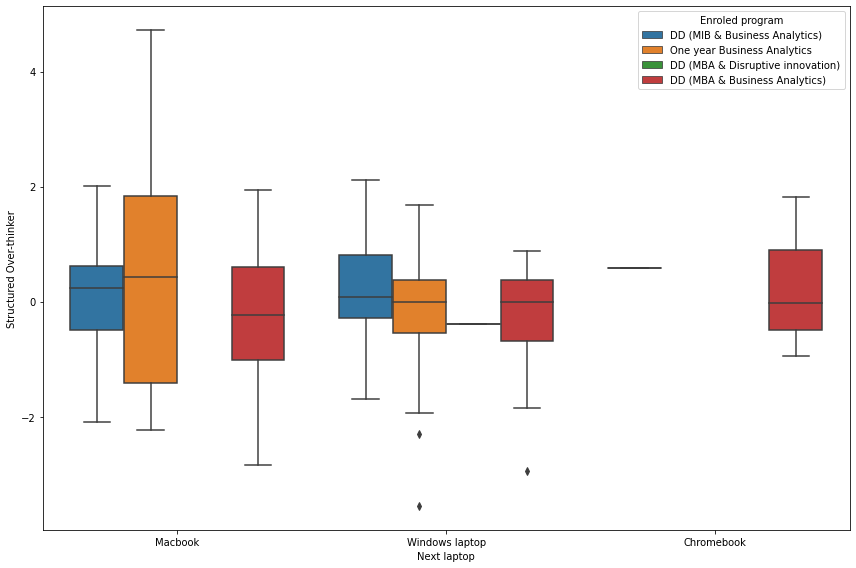

In [33]:
########################
# Next laptop - Age group
########################

for item in ["Depressed Artists","Your psychologist","Structured Over-thinker"]:

    fig, ax = plt.subplots(figsize = (12, 8))
    sns.boxplot(x = 'Next laptop',
                    y = item,
                    hue =  'Enroled program',
                    data = df_data_big5)

    # formatting and displaying the plot
    plt.tight_layout()
    plt.show()

For depressed artist and structured over-thinkers there where a tendency to be preferred by one year business analytic students. 

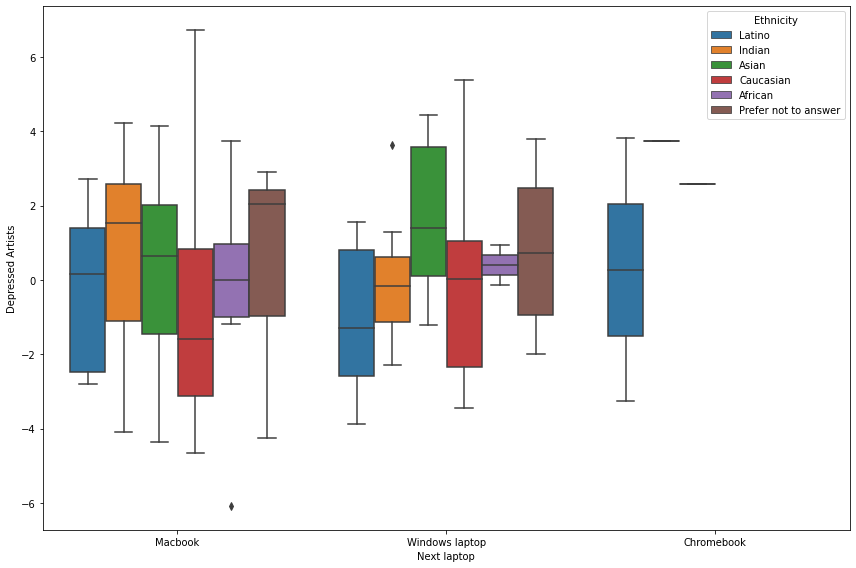

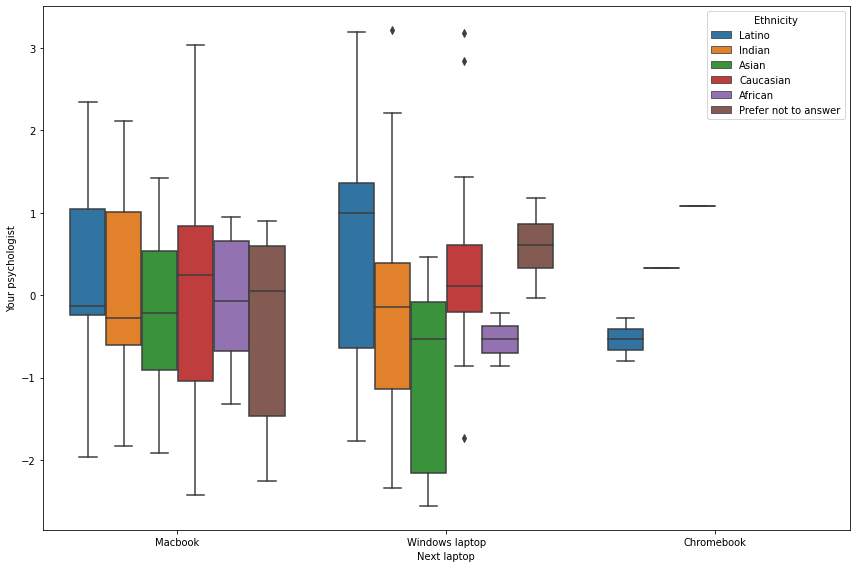

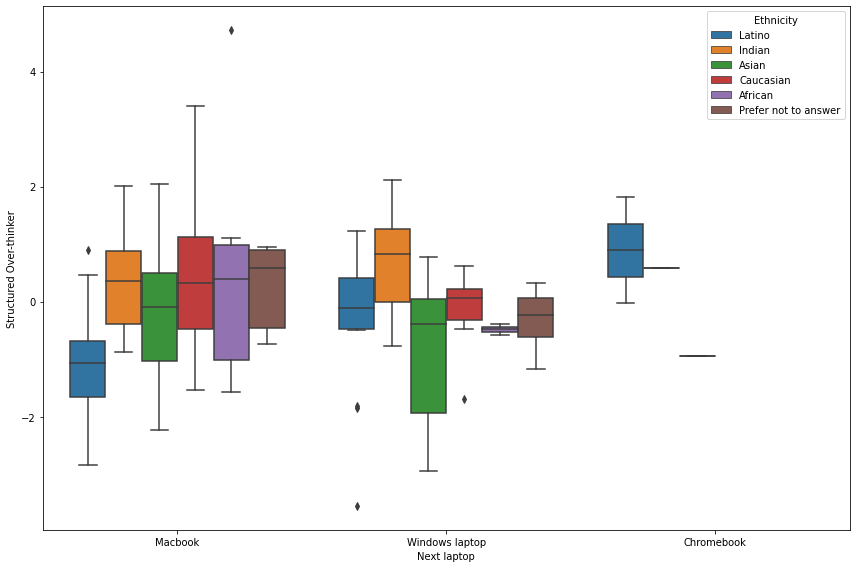

In [34]:
########################
# Next laptop - Age group
########################

for item in ["Depressed Artists","Your psychologist","Structured Over-thinker"]:

    fig, ax = plt.subplots(figsize = (12, 8))
    sns.boxplot(x = 'Next laptop',
                    y = item,
                    hue = 'Ethnicity',
                    data = df_data_big5)

    # formatting and displaying the plot
    plt.tight_layout()
    plt.show()


For depressed artist the Indians preferred Macbook. While it for your psychologist where caucasian. lastly, the structured over-thinker had a low mean but was the favorite for caucasians an africans. 

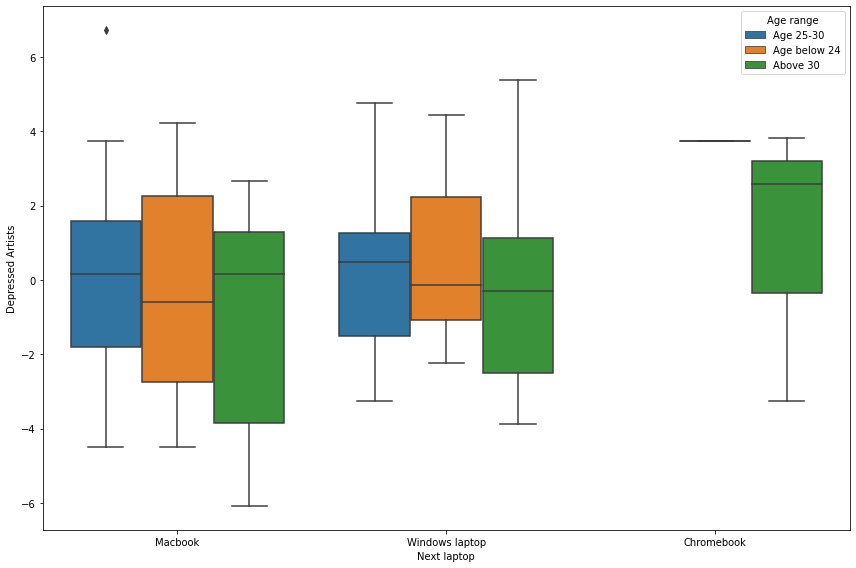

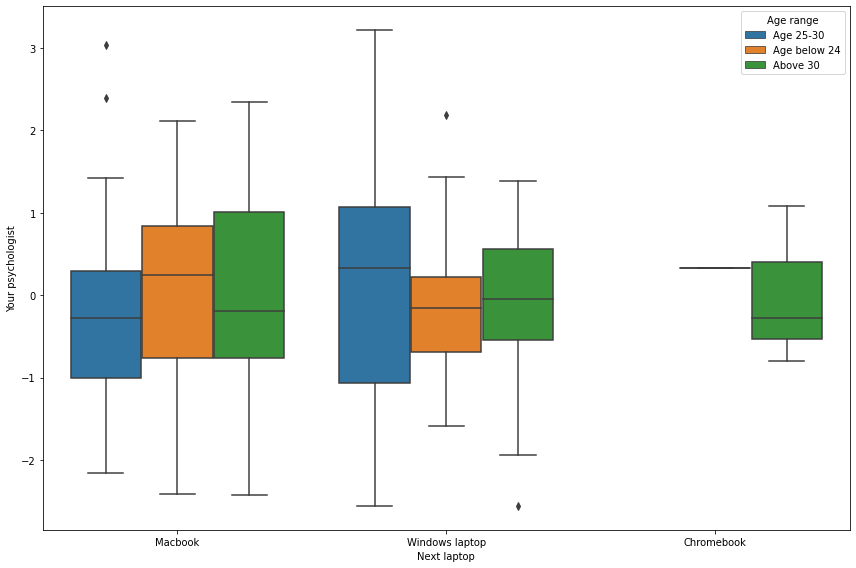

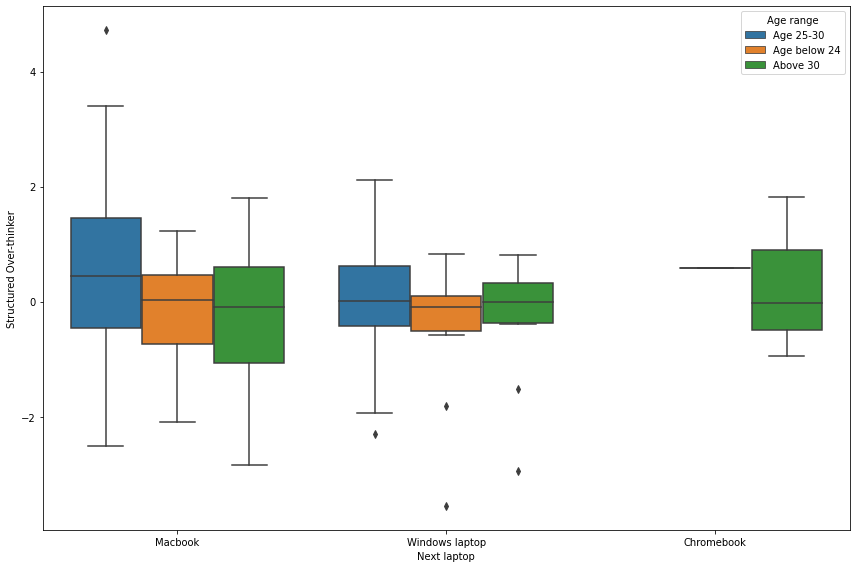

In [35]:
########################
# Next laptop - Age group
########################

for item in ["Depressed Artists","Your psychologist","Structured Over-thinker"]:

    fig, ax = plt.subplots(figsize = (12, 8))
    sns.boxplot(x = 'Next laptop',
                    y = item,
                    hue = 'Age range',
                    data = df_data_big5)

    # formatting and displaying the plot
    plt.tight_layout()
    plt.show()


For depressed artist the age did not show a high mean, however, the below 24 years group had a negative mean. 

Within Your Psychologist it can be detected that the majority of the group buying either Macbook or Windows is under 24 this correlates with the study showing that 71% of students prefer macbooks (Thabron, 2019). 

The last group was preferred of the 25-30 years. 

In general it was found that there was more outliers for the under 24 years which means the group is more heterogeneous while the above 30 group was more centered and thus homogeneous. 

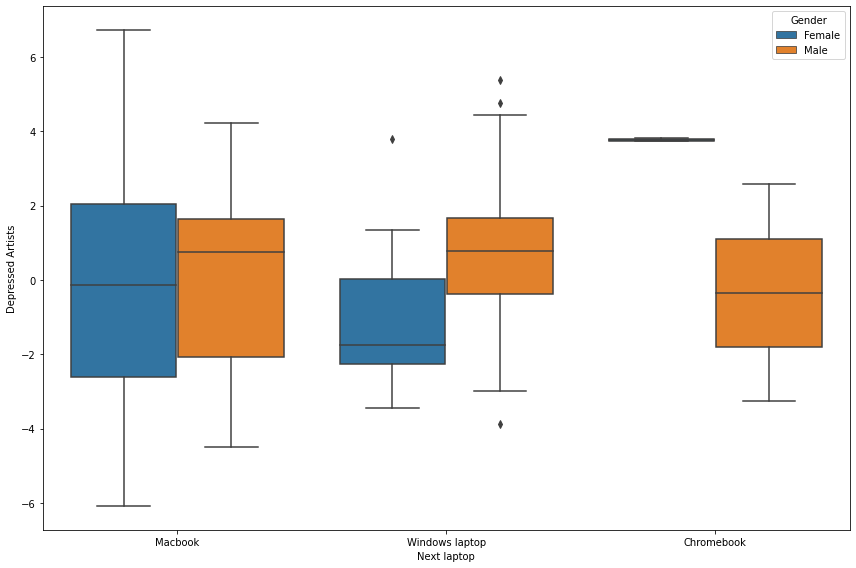

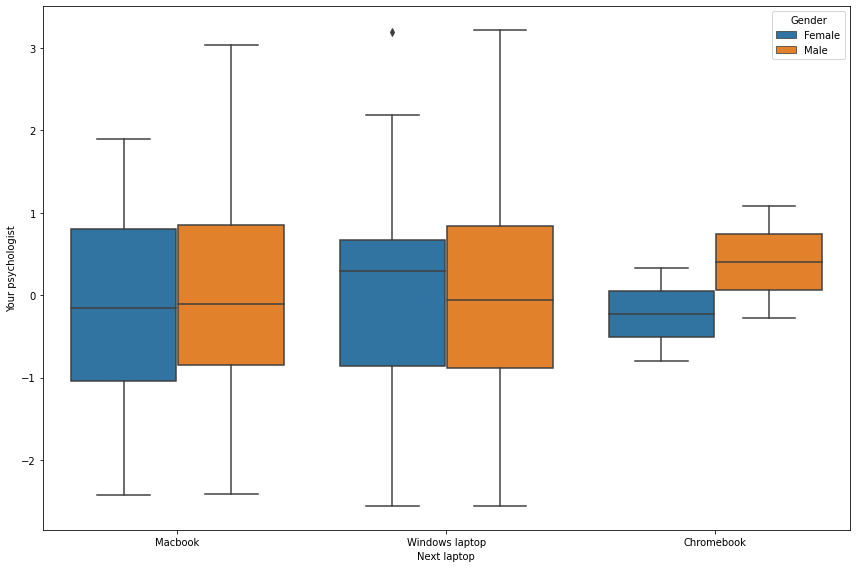

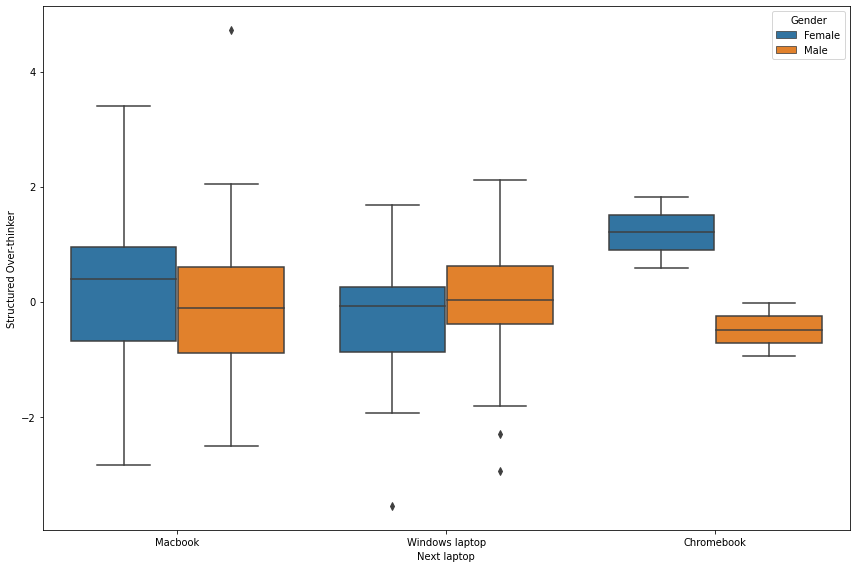

In [36]:
########################
# Next laptop - Gender
########################

for item in  ["Depressed Artists","Your psychologist","Structured Over-thinker"]:

    fig, ax = plt.subplots(figsize = (12, 8))
    sns.boxplot(x = 'Next laptop',
                    y = item,
                    hue = 'Gender',
                    data = df_data_big5)

    # formatting and displaying the plot
    plt.tight_layout()
    plt.show()


For the depressed artist it can be identified that it is most males that prefers most Macbook and Windows, while it for your psychology did not matter for Macbook and for Structured Overthink it where females that has the highest mean. 

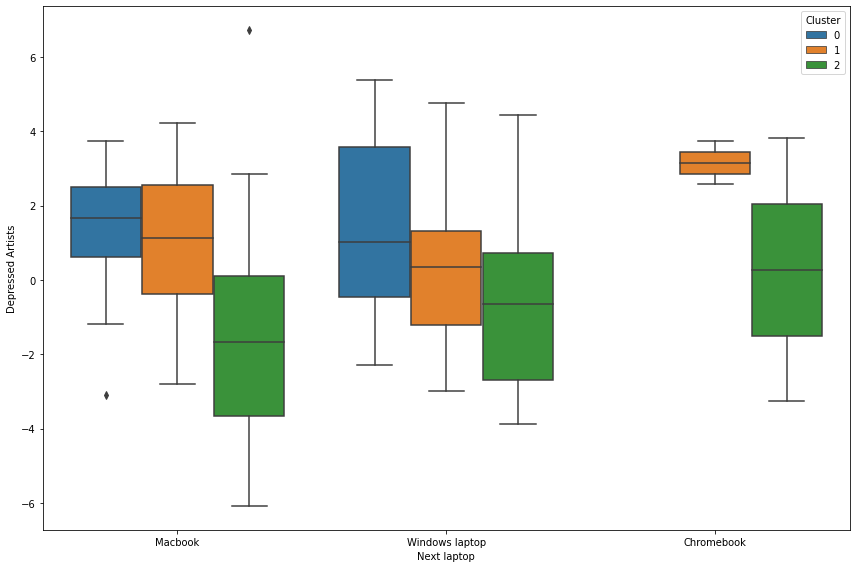

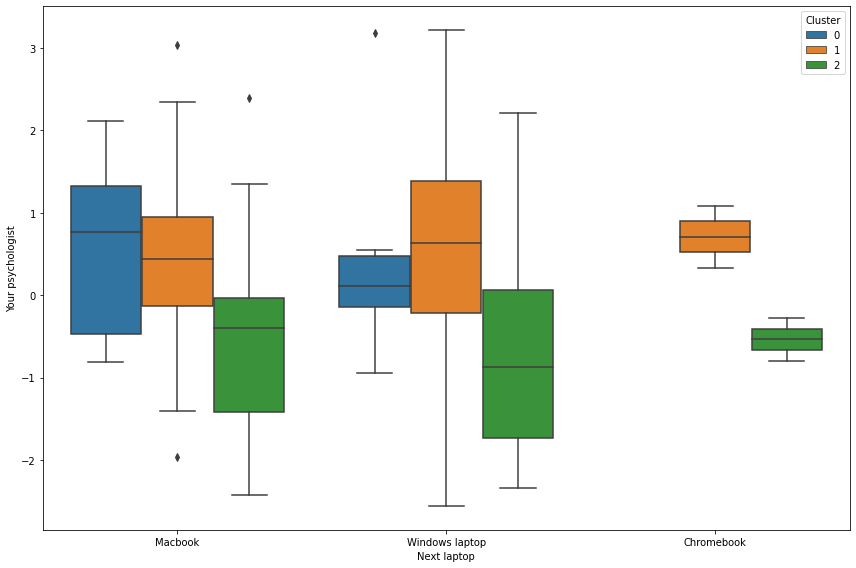

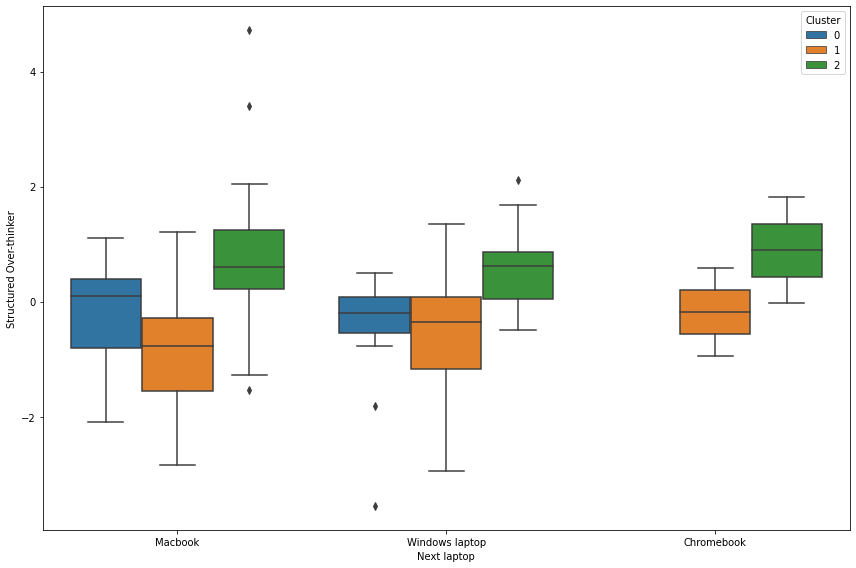

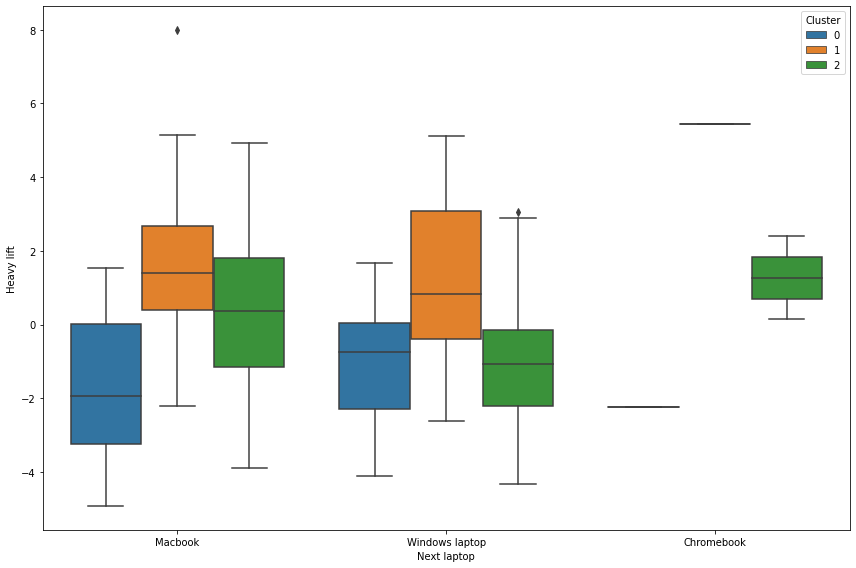

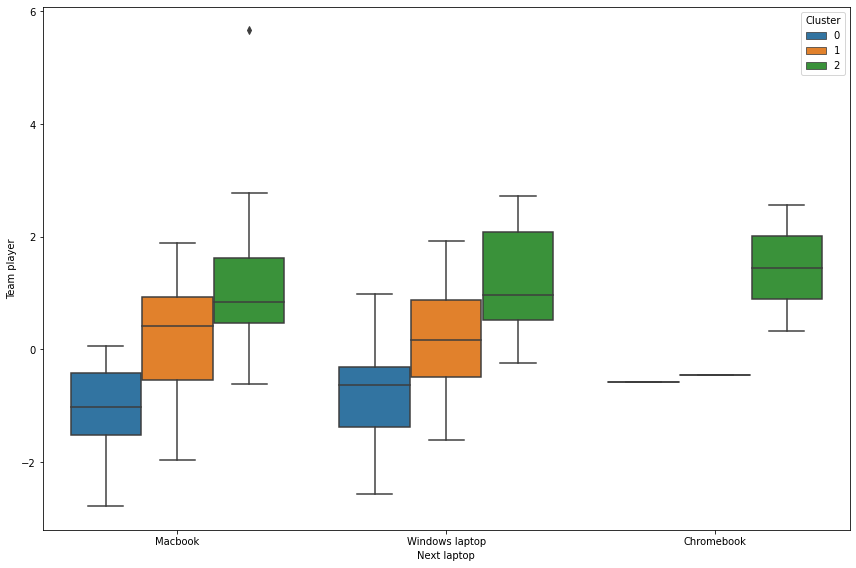

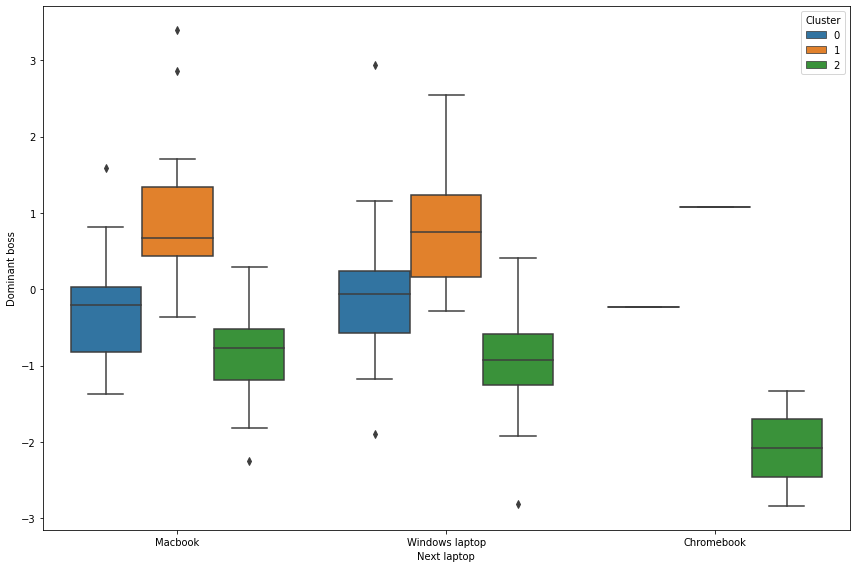

In [37]:
########################
# Next laptop - Cluster
########################

for item in  ["Depressed Artists","Your psychologist","Structured Over-thinker"]:

    fig, ax = plt.subplots(figsize = (12, 8))
    sns.boxplot(x = 'Next laptop',
                    y = item,
                    hue = 'Cluster',
                    data = df_data_big5)

    # formatting and displaying the plot
    plt.tight_layout()
    plt.show()

for item in df_data_hult.columns[9:].to_list():

    fig, ax = plt.subplots(figsize = (12, 8))
    sns.boxplot(x = 'Next laptop',
                    y = item,
                    hue = 'Cluster',
                    data = df_data_hult)

    # formatting and displaying the plot
    plt.tight_layout()
    plt.show()




























For the clusters 0 and 1 of Depressed Artists there is bigger preference for Macbook's which 
makes sense as Apple computers are popular 
for its design and if you work with design 
or artistic tasks (Hanson, 2022).












Windows has a dedicated group of cluster 0's 
that prefer their brand which can be detected by the mean and the low variance. However. the two other
cluster of Stressed Sales prefer Macbooks. Though all clusters mean are close to 0 hence not much value to derive from this group. 












For the extroverted Party-animals it can be 
seen that cluster 0 prefers Macbook's while 
cluster 2 prefers Windows. Within this group
there is a big disagreement about whether to chose Macbook or Windows.














Within the Abstract Artistic Dreamer cluster 1 do not prefer either Macbook nor Windows. The mean is very close to 0 for all clusters which indicated that this group in general do no care about either. 











The Meditation-and-yoga lover clusters are behaving similar with cluster 0 prefering both Macbook and Windows. While the mean is below 0 for both cluster 1 and 2. 












For the outgoing German there is a low variance suggesting the homogeneity. Windows is preferred among cluster 0. 












For the Easy-going entrepreneur the clusters are again behaving similar. Where both cluster 1 prefers Windows and Mac. The spreading for the three clusters are also bigger than for some of the other personas. 









For your psychologist there is a preference for Macbooks for cluster 0 and moreover, the variance is low suggesting homogeneity. 











For the structured overthinker cluster 2 prefers Macbooks as well as all the variables have somewhat low variance. 














Within the open-hearted hippie there is not a clear favorite in any of the clusters as all the means are close to 0. However, there is a small preference for Windows in cluster 2. 









**************************************************
HULT DNA
**************************************************

For Heavy lift there is a lot of variance within the three clusters however a similar pattern. However, Cluster 1 prefer Macbook which accordingly has the highest mean. 










Once again a similar pattern in the clusters for Macbook and Windows can be detected. Where cluster 3 has the highest preference for both Macbooks and Windows.  














Lastly, for the dominant boss the mean is highest for cluster 1 for both Macbook and Windows.


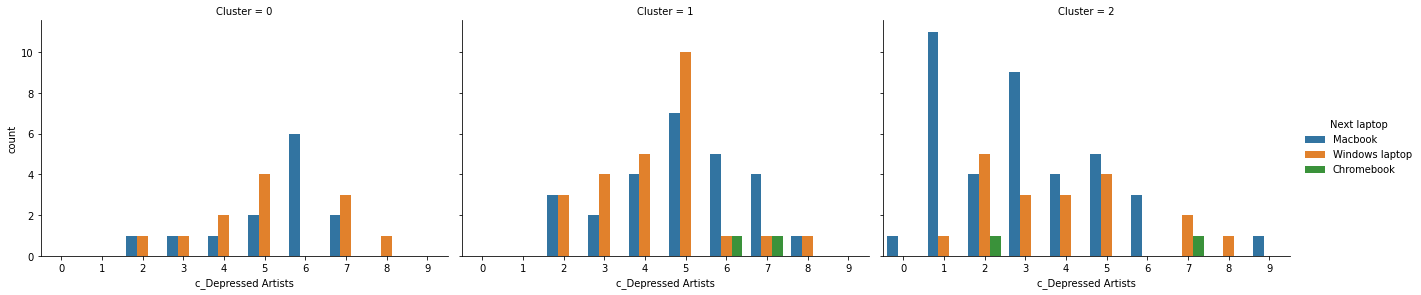

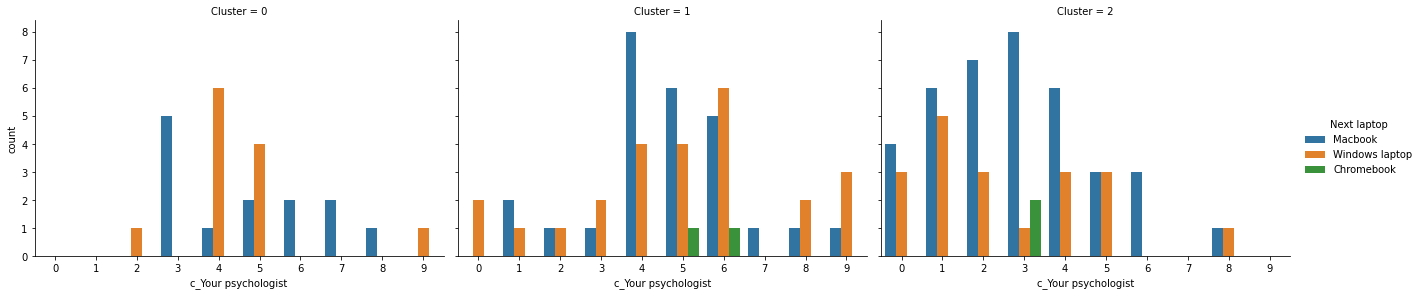

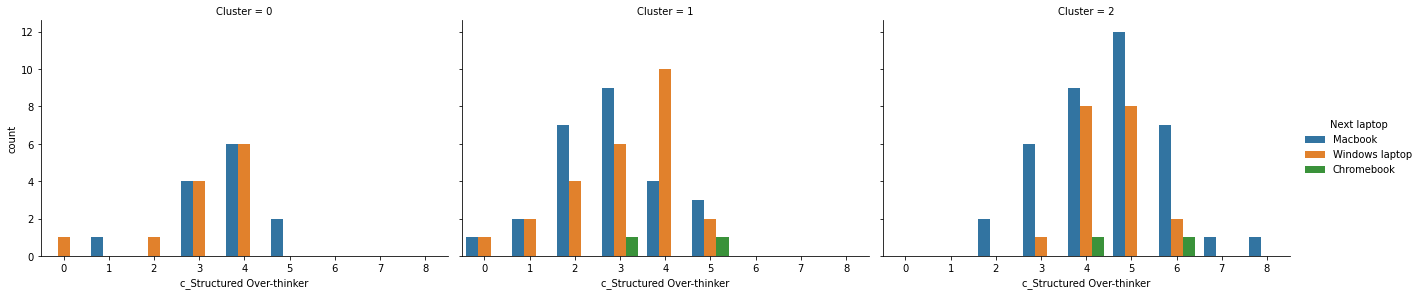

In [38]:
# Binning columns showing personas to count the number of people planning to buy laptops for Big5
for item in df_data_big5.columns[9:].to_list():
    df_data_big5.loc[:, 'c_' + item] = pd.cut(df_data_big5[item], bins=10)
    label = LabelEncoder()
    df_data_big5['c_' + item] = label.fit_transform(df_data_big5['c_' + item])

# show graphs representing the number of potential customers    
for item in ['c_Depressed Artists', 'c_Your psychologist', 'c_Structured Over-thinker']:
    sns.catplot(x=item, hue="Next laptop", col="Cluster", data=df_data_big5, kind="count", height=4, aspect=1.5)
    plt.show()


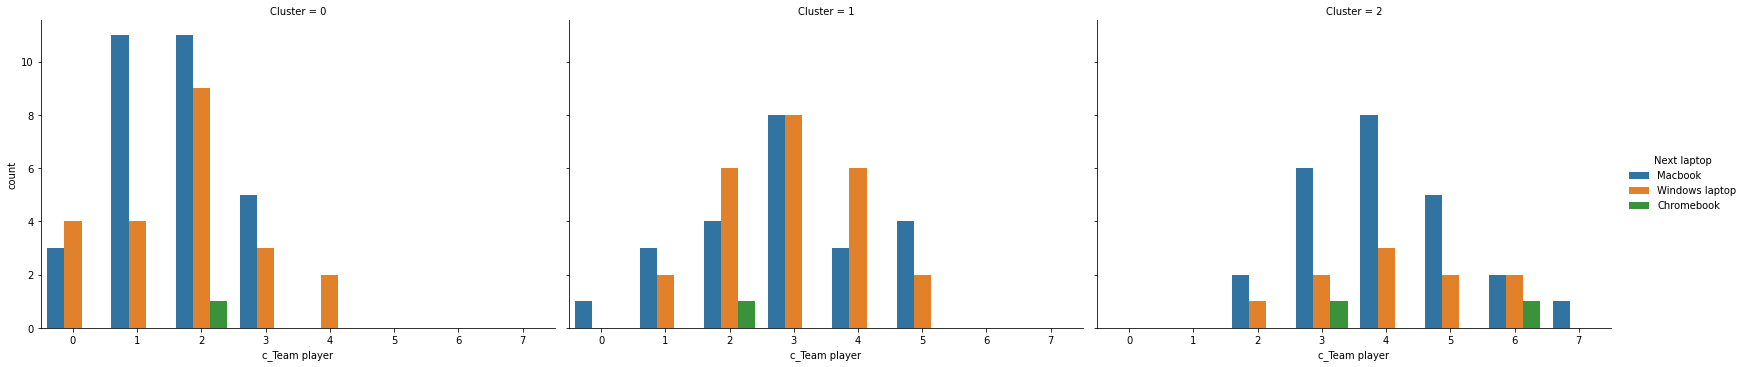

In [39]:
# Binning columns showing personas to count the number of people planning to buy laptops for Hult DNA
for item in df_data_hult.columns[-3:].to_list():
    df_data_hult.loc[:, 'c_' + item] = pd.cut(df_data_hult[item], bins=10)
    label = LabelEncoder()
    df_data_hult['c_' + item] = label.fit_transform(df_data_hult['c_' + item])

# show graphs representing the number of potential customers
for item in ['c_Team player']:
    sns.catplot(x=item, hue="Next laptop", col="Cluster", data=df_data_hult, kind="count", height=5, aspect=1.5)
    plt.show()

<strong>Conclusion:</strong>
    
Three groups of personas prefers Macbooks
- Depressed Artists (cluster 0 + 1) + male + negative correlation for under 24 + Indians + One year Business Analytics Students
- Your psychologist (cluster 0) + low variance + positive correlation for below 24 + Caucasians 
- Structured overthinker (cluster 2) + low variance + small positive for 35-30 + Caucasians & Africans + One year Business Analytics Students

The depressed artist ranks high in abstract ideas and this group values Macbooks user and designer friendly UX. There is a bigger chance for it to be male than an female in this group. 

The psychologist is a clever person, that likes to listens and also value abstract ideas. The variance is low, and people 24 or younger is more likely to buy a Macbook. Hence, it is suggested to target psychology students. 

Lastly, the structured overthinker values structure where Apple has a connected system between its devices which is good for this persona. However, the person also thinks abstract and can benefit from the good UX and that it is good for designers. 

<strong>Close competition:</strong>
- Team Player
- Dominant Boss

People in these groups are just as likely to purchase a Macbook as an Windows. As these two personas did not give any significance difference it is suggested to focus on the three above personas from the big 5. However, as the means are so similar to Windows it is also an opportunity to win them over as they are yet to decide a preference.  

<strong>References:</strong>

Hansson, 2021
https://www.techradar.com/news/best-laptops-for-graphic-design

Bailey, 2021
https://victorbailey.com/gear/best-laptop-for-listening-to-music/

Thubron, 2019
https://www.techspot.com/news/80220-71-students-own-or-would-prefer-mac-claims.html
